# Bins on the sphere

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
reduced_types_14 = [  # 'LowF',  # 1
                    'C_ar6x', 'C_ar6', 'C_ar', 'C_sp1', 'C_sp2', 'C_sp3', 'C_co2', 'C_guh',  # 8
                    'N_arp', 'N_arA', 'N_3s', 'N_1', 'N_o2', 'N_oh', 'N_amA', 'N_guh', 'N_2p', 'N_2s', 'N_3p', 'N_3t', 'N_4',  # 14
                    'O_3et', 'O_n', 'O_3ac', 'O_carb', 'O_co2', 'O_3oh', 'O_ar',  # 8
                    'S_3', 'S_r', 'S_o', 'S_o2', 'P_3', 'P_o',  # 5
                    'F_0', 'Cl_0', 'Br_0', 'I_0', 'F_i', 'Cl_i'  # 7
                    ]

amino_res_types = [  # 'X=-1',
                 'ALA','ARG', 'ASN', 'ASP', 'CYS', 'GLN',
                 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER',
                 'THR', 'TRP', 'TYR', 'MSE', 'VAL'
                 ]

In [2]:
# from mayavi import mlab

import pylab as pl

def mlab_show():
    arr = mlab.screenshot()
    print(arr.shape)
    pl.figure(figsize=(10,10))
    pl.imshow(arr)
    pl.axis('off')
    pl.show()

%matplotlib inline

#mlab.init_notebook(backend='ipy')

import numpy as np

# Create a sphere
#r = 1.0
#pi = np.pi
#cos = np.cos
#sin = np.sin
#phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]

#x = r*sin(phi)*cos(theta)
#y = r*sin(phi)*sin(theta)
#z = r*cos(phi)

#mlab.figure(bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(1024, 768))
#mlab.clf()

def uniform_on_sphere(n):
    x = np.random.randn(n, 3)
    x = x / np.sqrt((x ** 2).sum(axis=1))[:,np.newaxis]
    return x

data = uniform_on_sphere(1000)



# #mlab.mesh(x , y , z, color=(0.0,0.5,1.0), line_width=0.1)
# #mlab.points3d(data[:,0], data[:,1], data[:,2], scale_factor=0.05)

# mlab.figure(bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(1024, 768))

# bright_colors = [
#     (1, 0, 0),
#     (0, 1, 0),
#     (0, 0, 1),
#     (1, 1, 0),
#     (1, 0, 1),
#     (0, 1, 1)
# ]

# steps = 10
# step_points = 10
# for u in range(steps):
#     for v in range(steps):
#         ug = np.linspace(u / steps, (u + 1) / steps, step_points)
#         vg = np.linspace(v / steps, (v + 1) / steps, step_points)
        
#         ug, vg = np.meshgrid(ug, vg)
        
#         # θ=2πu
#         # ϕ=arccos(2v−1)
        
#         theta = 2 * np.pi * ug
#         phi = np.arccos(2 * vg - 1)
        
#         r = 1.0
#         x = r*np.sin(phi)*np.cos(theta)
#         y = r*np.sin(phi)*np.sin(theta)
#         z = r * np.cos(phi)
        
#         #print(x.shape, y.shape, z.shape)
        
#         mlab.mesh(x, y, z, color=bright_colors[(u + v) % len(bright_colors)], line_width=0.1)


# mlab_show()

In [3]:
x = uniform_on_sphere(10000)

In [4]:
def cartesian_to_spherical(x):
    # x = r*np.sin(phi)*np.cos(theta)
    # y = r*np.sin(phi)*np.sin(theta)
    # z = r * np.cos(phi)
    
    r = 1.0
    phi = np.arccos(x[:,2] / r)
    theta = np.arctan2(x[:,0], x[:,1])
    
    return phi, theta



In [5]:
def map_to_square(phi, theta):
    assert phi.max() <= np.pi + 1e-3
    assert phi.min() >= -1e-3
    
    u = theta / (2 * np.pi)
    v = (np.cos(phi) + 1) / 2
    u[u < 0] += 1
    u[u > 1] -= 1
    v[v < 0] += 1
    v[v > 1] -= 1
    return u, v

def map_to_bins(u, v, bins_per_axis):
    ub = np.clip(np.floor(u * bins_per_axis).astype(np.uint32), 0, bins_per_axis - 1)
    vb = np.clip(np.floor(v * bins_per_axis).astype(np.uint32), 0, bins_per_axis - 1)
    
    bin_idx = ub * bins_per_axis + vb
    #print(bin_idx)
    bin_counts = np.bincount(bin_idx.flatten())
    #print(bin_counts)
    assert len(bin_counts) <= bins_per_axis * bins_per_axis
    assert np.sum(bin_counts) == len(u)
    bin_counts = np.pad(bin_counts, (0, bins_per_axis * bins_per_axis - len(bin_counts)))
    return bin_counts

In [6]:
bins = map_to_bins(u, v, 10)

NameError: name 'u' is not defined

In [7]:
def uniformity_chi_stat(bins):
    num_obs = np.sum(bins)
    expected = num_obs / len(bins)
    #print('expected per bin', expected)
    return np.sum((bins - expected) ** 2 / expected), len(bins) - 1

In [8]:
def non_uniform_on_sphere(n):
    phi = np.random.uniform(0, np.pi, n)
    theta = np.random.uniform(0, np.pi * 2, n)
    # x = r*np.sin(phi)*np.cos(theta)
    # y = r*np.sin(phi)*np.sin(theta)
    # z = r * np.cos(phi)
    res = np.zeros(shape=(n, 3))
    res[:,0] = np.sin(phi) * np.cos(theta)
    res[:,1] = np.sin(phi) * np.sin(theta)
    res[:,2] = np.cos(phi)
    #print(res)
    return res

[356 189 144 132 139 144 357 339 173 122 128 123 154 355 350 145 140 135
 125 173 321 347 167 144 151 125 161 364 356 162 146 117 156 167 341 387
 153 126 115 141 160 329 337 139 141 137 126 147 414]
2239.4453999999996
KstestResult(statistic=0.07818511312619736, pvalue=1.603067238429845e-53)
p-value (~ probability is uniform): 0.0
Power_divergenceResult(statistic=2239.4453999999996, pvalue=0.0)

is uniform (strict): no
KstestResult(statistic=0.07471859204871972, pvalue=6.4395378969396355e-49)
is uniform (strict): no


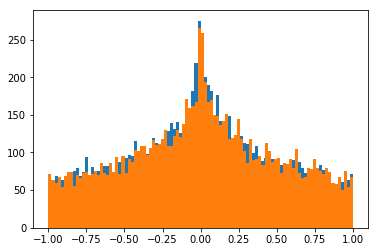

In [42]:
from scipy.stats import chi2
import scipy.stats

def do_test(verbose):
    x = non_uniform_on_sphere(10000)
    phi, theta = cartesian_to_spherical(x)
    u, v = map_to_square(phi, theta)
    bins = map_to_bins(u, v, 7)
    chi_stat, dof = uniformity_chi_stat(bins)
    if verbose:
        print(bins)
        print(chi_stat)
    plt.hist(x[:,0], bins=100)
    print(scipy.stats.kstest(x[:,0], scipy.stats.uniform(loc=-1, scale=2).cdf))

    # probability of failure when rejecting the null hypothesis 'it is uniform' when it is true
    p_value = 1 - chi2.cdf(chi_stat, dof)
    if verbose:
        print('p-value (~ probability is uniform):', p_value)
        print(scipy.stats.chisquare(bins))
        print()

    print('is uniform (strict):', ('yes' if p_value > 0.01 else 'no'))
    
do_test(True)

for i in range(1):
    do_test(False)

# Reference uniform distribution

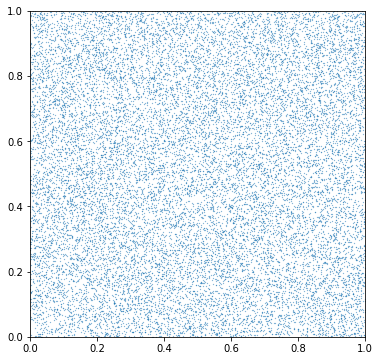

In [16]:
n = 20000
x = uniform_on_sphere(n)
phi, theta = cartesian_to_spherical(x)
u, v = map_to_square(phi, theta)
plot_square(u, v)

# Reference non-uniform distribution (($\psi, \theta$)-uniform)

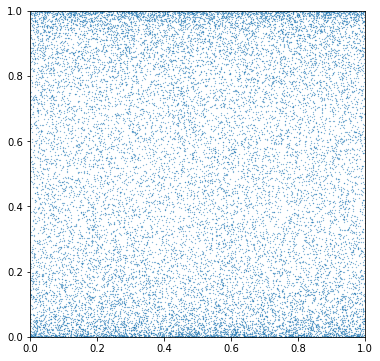

In [17]:
x = non_uniform_on_sphere(20000)
phi, theta = cartesian_to_spherical(x)
u, v = map_to_square(phi, theta)

plot_square(u, v)


# Real distribution plots

In [12]:
import os
import array

data_path = '/media/hdd1/data/pdbbind/2016/korp_stats_nonames.bin'
double_size = 8

n_nums = int(os.path.getsize(data_path)/double_size)
n_content = 5
if n_nums % n_content != 0:
    print("Oops, something went wrong with the file size and contents.")
n_entries = int(n_nums/n_content)
F = open(data_path, 'rb')
data = array.array('d')
data.fromfile(F, n_nums)
F.close()
data = np.array(data)
data = np.reshape(data, (n_entries, n_content))
print(np.shape(data))

(47916041, 5)


In [13]:
data[:5]

array([[10.        , 13.        , 18.35012272,  2.84635897,  3.58099849],
       [11.        , 13.        , 19.58776331,  0.94729078,  2.65130192],
       [ 1.        , 13.        , 16.27541755,  2.57432665,  2.69985052],
       [14.        , 13.        , 16.11988392,  1.16478043,  4.83862683],
       [10.        , 13.        , 12.37842154,  1.00788748,  2.3572276 ]])

0. protein residue type (it was originally an int)

1.  ligand atom type (it was originally an int) 

2. distance

3. theta angle (between the vector and Z, 0-pi)

4. psi angle (between the vector projection and X, 0-2pi)


In [14]:
data_local = data[np.where((data[:, 0] == 0.) & (data[:, 1] == 4.))][:, 2:]

In [15]:
def plot_square(u, v):
    plt.figure(figsize=(6,6))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.scatter(u, v, s=1000.0 / len(u))
    plt.show()


In [102]:
def plot_for_distance_range(data, d_min, d_max):
    data_local = data[np.where(
        (data[:, 2] > d_min) & (data[:, 2] <= d_max))
    ][:, 3:]
    
    #print(data_local.shape[0])
    if data_local.shape[0] < 10:
        return
        
    u, v = map_to_square(data_local[:,0], data_local[:,1])
    bins = map_to_bins(u, v, 3)
    #print(bins)
    chi_stat, dof = uniformity_chi_stat(bins)

    #p_value = 1 - chi2.cdf(chi_stat, dof)
    
    p_value = scipy.stats.chisquare(bins).pvalue
    print('Distance ({};{}]:'.format(d_min, d_max), '{} values'.format(np.sum(bins)), 'bins', bins, 'p-value', p_value)
    #print('p-value (~ probability is uniform):', p_value)
    #print(scipy.stats.chisquare(bins))
    #print()
    #print('is uniform (strict):', ('yes' if p_value > 0.01 else 'no'))

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.text(0.1, 0.85, '({},{}]'.format(d_min, d_max), color='fuchsia', fontsize=20)
    plt.scatter(u, v, s=100.0 / len(u))
    
def plot_for_pair(a, b):
    plt.figure(figsize=(15, 15))
    sub_data = data[np.where(
            (data[:, 0] == a) &
            (data[:, 1] == b))
        ][:,:]
    a_t = '({0})'.format(amino_res_types[a])
    l_t = '({0})'.format(reduced_types_14[b])
    print('Got', sub_data.shape[0], 'values of', data.shape[0], 'for pair', a, a_t, '-', b, l_t)
    for d in range(2, 20):
        plt.subplot(5, 4, 1 + d)
        plot_for_distance_range(sub_data, d, d + 1)
    plt.show()

def plot_for_protein(a):
    plt.figure(figsize=(15, 15))
    sub_data = data[np.where(
            (data[:, 0] == a))
        ][:,:]
    a_t = '({0})'.format(amino_res_types[a])
    print('Got', sub_data.shape[0], 'values of', data.shape[0], 'for protein type', a, a_t)
    for d in range(2, 20):
        plt.subplot(5, 4, 1 + d)
        plot_for_distance_range(sub_data, d, d + 1)
    plt.show()

def plot_for_ligand(a):
    plt.figure(figsize=(15, 15))
    sub_data = data[np.where(
            (data[:, 1] == a))
        ][:,:]
    l_t = '({0})'.format(reduced_types_14[a])
    print('Got', sub_data.shape[0], 'values of', data.shape[0], 'for ligand type', a, l_t)
    for d in range(2, 20):
        plt.subplot(5, 4, 1 + d)
        plot_for_distance_range(sub_data, d, d + 1)
    plt.show()
    
    #plot_square(u, v)
    
#plot_for_distance_range(0, 0, 1, 4)
#plot_for_distance_range(0, 0, 4, 10)
#plot_for_distance_range(0, 0, 10, 20)

# Pair 0 - 0

Got 687016 values of 47916041 for pair 0 (ALA) - 0 (C_ar6x)
Distance (3;4]: 1030 values bins [509 157  31 299   9   0  16   6   3] p-value 0.0
Distance (4;5]: 6283 values bins [1617  390  177 1644  583   72 1147  442  211] p-value 0.0
Distance (5;6]: 10863 values bins [1432  872  314 1746 1333  422 3322 1013  409] p-value 0.0
Distance (6;7]: 13758 values bins [1809 1625  716 2004 1539  684 3367 1288  726] p-value 0.0
Distance (7;8]: 18457 values bins [2529 2016 1878 2372 1701 1096 3692 1621 1552] p-value 0.0
Distance (8;9]: 24424 values bins [2440 2930 2901 2615 2160 1900 4774 2357 2347] p-value 0.0
Distance (9;10]: 32468 values bins [2773 3910 4011 2936 3290 2681 5751 3844 3272] p-value 0.0
Distance (10;11]: 40460 values bins [3274 4394 4837 3843 4122 3343 6368 5530 4749] p-value 0.0
Distance (11;12]: 44812 values bins [3697 4406 5404 4594 3868 3751 6012 6162 6918] p-value 0.0
Distance (12;13]: 50322 values bins [4105 5092 5617 5288 3998 5217 6161 6827 8017] p-value 0.0
Distance (13;1

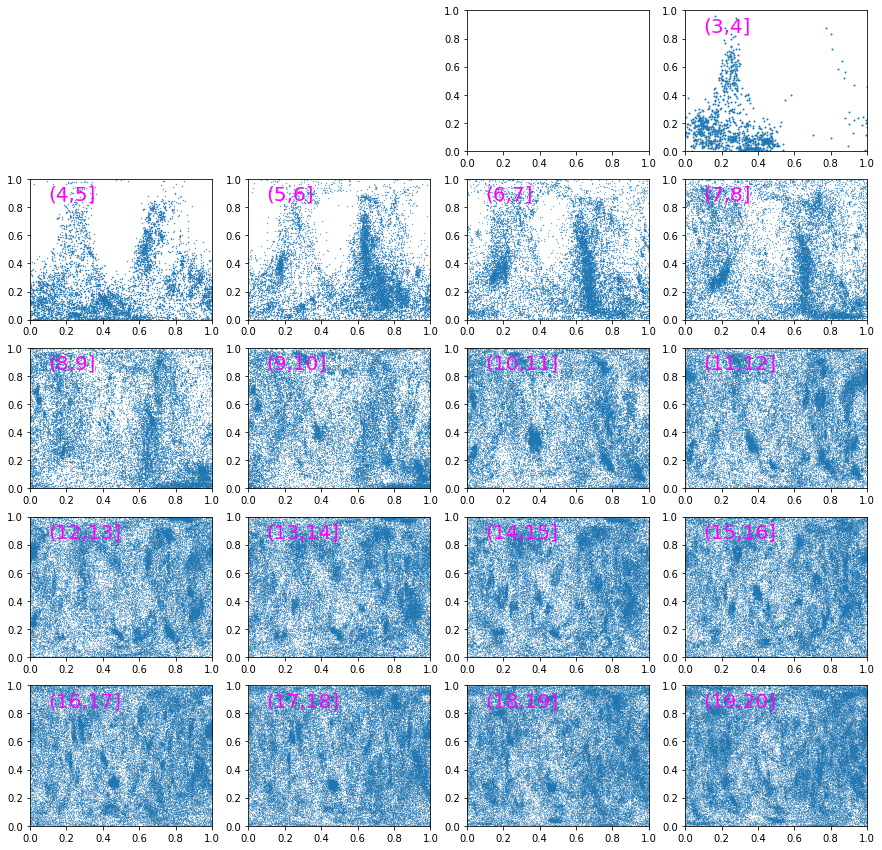

In [63]:
plot_for_pair(0, 0)


# Pair 0 - 1

Got 78659 values of 47916041 for pair 8 (HIS) - 23 (O_3ac)
Distance (3;4]: 215 values bins [85 61  0 50  3  0  1  0 15] p-value 2.0632037857131934e-72
Distance (4;5]: 266 values bins [26  3 32 50 21  3 80 41 10] p-value 2.7427862058506895e-32
Distance (5;6]: 767 values bins [ 99  80  29  94  46  31 292  67  29] p-value 4.703924176164441e-132
Distance (6;7]: 1667 values bins [335 191  64 190 177 254 221 133 102] p-value 4.5652872964008236e-57
Distance (7;8]: 2842 values bins [293 172 133 486 227 135 812 218 366] p-value 3.730228209394439e-256
Distance (8;9]: 2814 values bins [337 188 278 330 378 170 618 321 194] p-value 2.7566991853161295e-98
Distance (9;10]: 4879 values bins [ 450  292  593  530  458  337 1083  744  392] p-value 2.4124935349667474e-185
Distance (10;11]: 5336 values bins [ 585  324  481  660  475  349 1193  776  493] p-value 6.5136088931983076e-201
Distance (11;12]: 5549 values bins [547 446 497 692 680 433 980 846 428] p-value 3.7989668015222463e-104
Distance (12;13]: 

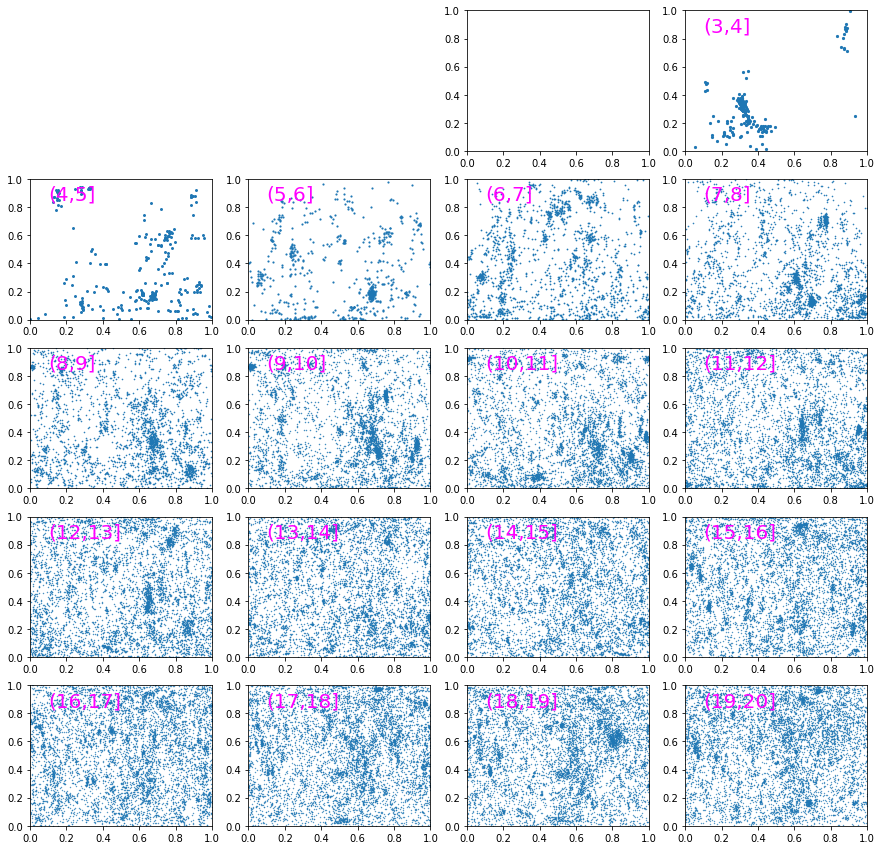

In [82]:
plot_for_pair(0, 1)

# Histidine -- Oxygene (probably negatively charged)

Got 42941 values of 47916041 for pair 8 (HIS) - 25 (O_co2)
Distance (3;4]: 128 values bins [53 16  0 45  4  0  1  7  2] p-value 2.8390926003439446e-46
Distance (4;5]: 352 values bins [ 60   7  15 125  49   1  16  78   1] p-value 4.627111960052859e-75
Distance (5;6]: 378 values bins [71 19 16 81 42  8 90 33 18] p-value 2.4688074264919316e-35
Distance (6;7]: 1283 values bins [124  60  50 329 229  60 219 166  46] p-value 9.315390272795743e-117
Distance (7;8]: 1677 values bins [142  74  78 451 129  56 413 260  74] p-value 3.046502400052885e-210
Distance (8;9]: 1655 values bins [192  98 179 279 172  90 301 229 115] p-value 1.7566535419852683e-49
Distance (9;10]: 2166 values bins [223 119 177 353 216 177 450 254 197] p-value 4.200886649574019e-69
Distance (10;11]: 2627 values bins [255 202 168 479 251 211 549 278 234] p-value 8.530370269104687e-97
Distance (11;12]: 2734 values bins [238 178 198 439 297 258 526 339 261] p-value 2.7344159670522684e-69
Distance (12;13]: 2903 values bins [336 21

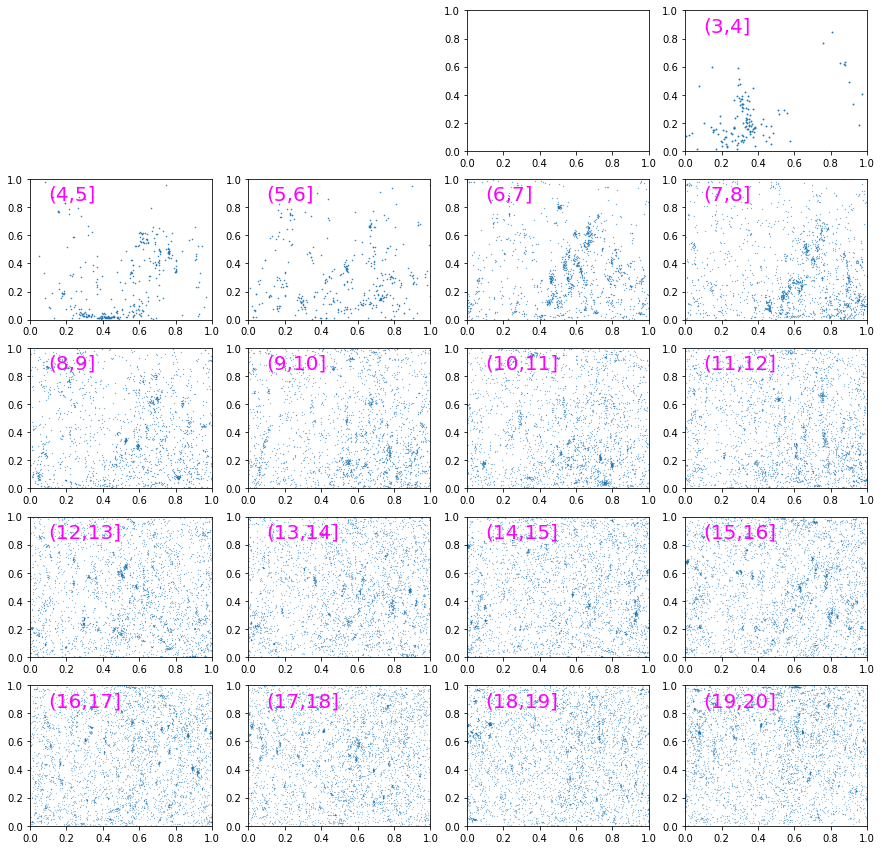

In [121]:
plot_for_pair(amino_res_types.index('HIS'), reduced_types_14.index('O_co2'))

# Top uniform distributions

In [ ]:
def get_uniformity_pvalue(data, a, b):
    data_local = data[np.where(
        (data[:, 0] == a) & (data[:, 1] == b)
    )][:, 3:]
    
    if data_local.shape[0] < 10:
        return 0, 0
        
    u, v = map_to_square(data_local[:,0], data_local[:,1])
    bins = map_to_bins(u, v, 3)
    #print(bins)
    chi_stat, dof = uniformity_chi_stat(bins)
    
    p_value = scipy.stats.chisquare(bins).pvalue
    print('Pair', a, b, ' num values', np.sum(bins), 'p-value:', p_value)
    
    return np.sum(bins), p_value

data_inf = data[np.where(
        (data[:, 2] > 16) & (data[:, 2] <= 20))]

top_p_values = []


for a in range(21):
    for b in range(40):
        num_values, p_value = get_uniformity_pvalue(data_inf, a, b)
        top_p_values.append((p_value, num_values, a, b))

top_p_values = sorted(top_p_values)[::-1]

In [369]:
top_p_values_with_many_points = [t for t in top_p_values if t[1] > 500]

for t in top_p_values_with_many_points[:10]:
    print(t)

(0.005289038550617875, 1790, 20, 34)
(0.0003667729609617166, 1220, 20, 27)
(1.4303682661028368e-05, 1004, 15, 27)
(4.101004012022975e-06, 1336, 0, 27)
(3.6692883577568982e-06, 556, 18, 9)
(3.4061003846108764e-06, 504, 10, 16)
(2.9146996135179107e-06, 708, 0, 2)
(7.269546900824107e-07, 1426, 8, 19)
(7.084211169632459e-07, 575, 7, 2)
(1.1937776607717386e-07, 902, 10, 2)


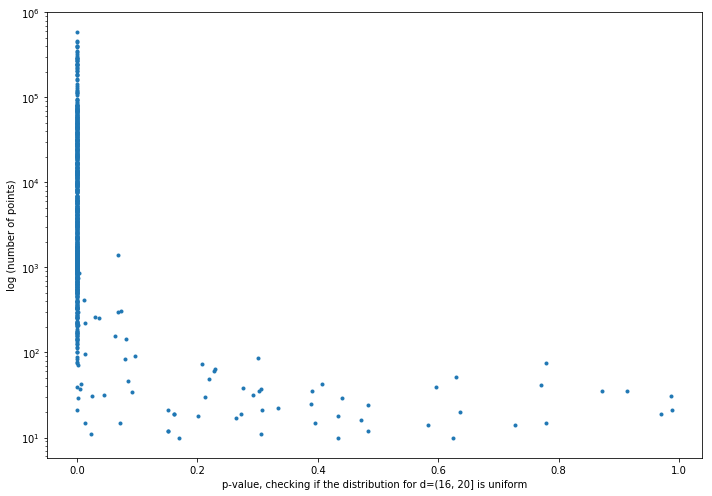

In [49]:
plt.plot(np.array(top_p_values)[:, 0], np.array(top_p_values)[:, 1], '.')
plt.yscale('log')
plt.xlabel('p-value, checking if the distribution for d=(16, 20] is uniform')
plt.ylabel('log (number of points)')
plt.gcf().set_size_inches((10, 7))
plt.tight_layout()
plt.savefig('/home/maria/Dropbox/lab/mipt/ligandsextractor/korp6d/plotted_16_20.png')

# Pair 20 - 34

In [119]:
plot_for_pair(20, 34)

# Pair 20 - 27

In [118]:
plot_for_pair(20, 27)

# Pair 15 - 27

Got 9576 values of 47916041 for pair 15 - 27
Distance (4;5]: 38 values bins [ 9  1  1 10  5  0  8  4  0] p-value 0.00019400795654445085
Distance (5;6]: 90 values bins [11  1  5  7 11  2 31 20  2] p-value 9.349867988736508e-14
Distance (6;7]: 108 values bins [11 12  8  5  5  9 38 17  3] p-value 3.916777449157565e-13
Distance (7;8]: 291 values bins [43 32 31 30 25 39 45 26 20] p-value 0.023668554283556218
Distance (8;9]: 377 values bins [34 37 40 20 30 51 69 64 32] p-value 3.292547829853806e-08
Distance (9;10]: 508 values bins [26 44 67 34 89 42 74 66 66] p-value 2.669825195423574e-10
Distance (10;11]: 500 values bins [57 49 40 33 70 54 67 75 55] p-value 0.0006294014400336462
Distance (11;12]: 673 values bins [ 53  57  91  61  73  53  96 116  73] p-value 1.8388558697389468e-08
Distance (12;13]: 770 values bins [ 63  56  85  56 101  80 117  94 118] p-value 6.277017168426747e-09
Distance (13;14]: 790 values bins [ 77  79  71  78 111  80  71 138  85] p-value 3.145382231731858e-07
Distance (

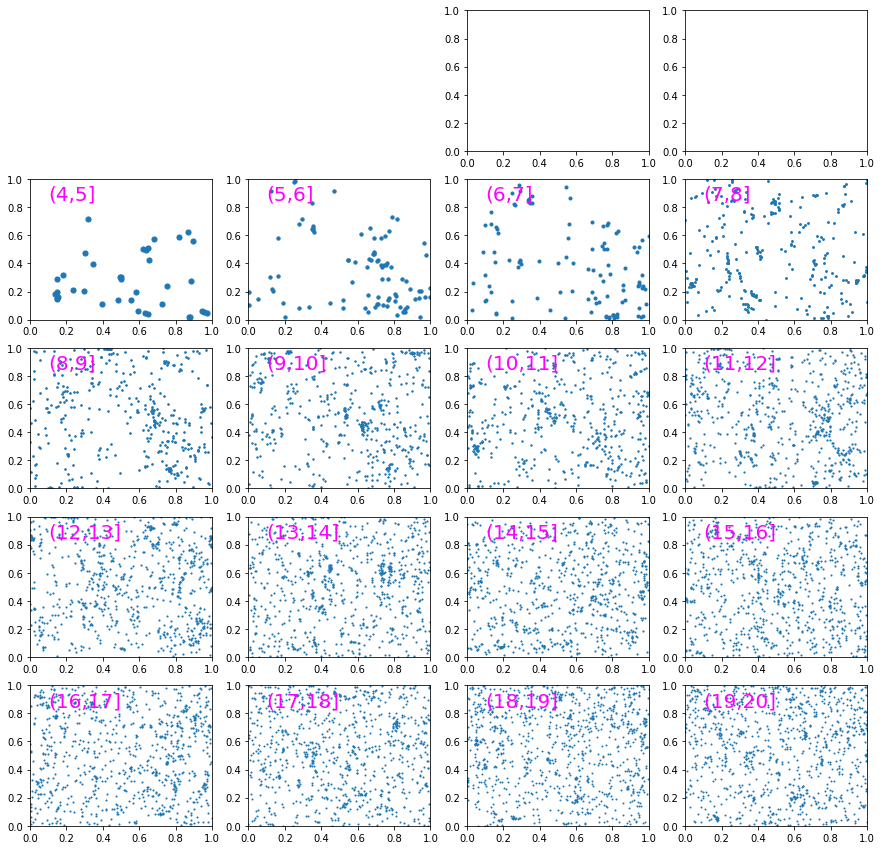

In [372]:
plot_for_pair(15, 27)

# More pictures for pair 0 - 1

In [115]:
print(data_local.shape)

for d in range(2, 20, 4):
    data_dist = data_local[data_local[:,0] > d][:,:]
    print(data_dist.shape)

    u, v = map_to_square(data_dist[:,1], data_dist[:,2])
    bins = map_to_bins(u, v, 4)
    print(bins)
    chi_stat, dof = uniformity_chi_stat(bins)

    p_value = 1 - chi2.cdf(chi_stat, dof)
    print('p-value (~ probability is uniform):', p_value)
    print(scipy.stats.chisquare(bins))
    print()
    print('is uniform (strict):', ('yes' if p_value > 0.01 else 'no'))

    plot_square(u, v)

# Amino acid - all ligand types
The distributions at 20 A look very different

In [ ]:
# long and positively charged
plot_for_protein(amino_res_types.index('ARG'))
plot_for_protein(amino_res_types.index('LYS'))
# long
plot_for_protein(amino_res_types.index('GLN'))
plot_for_protein(amino_res_types.index('ASN'))
# negatively charged, close to GLN and ASN
plot_for_protein(amino_res_types.index('GLU'))
plot_for_protein(amino_res_types.index('ASP'))
# short
plot_for_protein(amino_res_types.index('THR'))
plot_for_protein(amino_res_types.index('SER'))
plot_for_protein(amino_res_types.index('GLY'))

In [ ]:
# short and neutral
plot_for_protein(amino_res_types.index('VAL'))
plot_for_protein(amino_res_types.index('LEU'))
plot_for_protein(amino_res_types.index('ILE'))

In [ ]:
# heteroaromatic
plot_for_protein(amino_res_types.index('PHE'))
plot_for_protein(amino_res_types.index('TYR'))

In [ ]:
# positively charged aromatic ring (wih two nitrogens)
plot_for_protein(amino_res_types.index('HIS'))
# neutral aromatic ring (2 conjugated rings, 1 with nitrogen)
plot_for_protein(amino_res_types.index('TRP'))

In [ ]:
plot_for_protein(amino_res_types.index('ALA'))

In [ ]:
# contain sulfur
plot_for_protein(amino_res_types.index('CYS'))
plot_for_protein(amino_res_types.index('MET'))

In [ ]:
plot_for_protein(amino_res_types.index('PRO'))